<a href="https://colab.research.google.com/github/BrandonOrtiz7/Metodos-numericos/blob/main/Interpolaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np #arreglos y operaciones matemáticas
import sympy as sp #matemáticas simbólicas
import matplotlib.pyplot as plt # crear gráficos y visualizaciones.

In [10]:
# Función dada
def f(x):
    return 1 / (1 + 25 * x**2)

$\frac{1}{1 + 25x^2 }$


In [29]:
n = 9 #numero de puntos
x_coo = np.linspace(-1, 1, n) # nos da n puntos igualmente espaciados de -1 a 1
y_coo = f(x_coo) #eje de lasw y
puntos = list(zip(x_coo, y_coo))  #con zip hacemos pares ordenados con los valores de x y y (1,1), (2,3 etc
#con list metemos todo auna lista

In [30]:
# --- Interpolación de Lagrange ---
def lagrange_interpolacion(puntos):
    x = sp.Symbol('x')
    n = len(puntos)
    P = 0

    for i in range(n):
        xi, yi = puntos[i] #le asignamos a x y y su valor de as coordenadas obtenidas
        Li = 1  # inicializamos el producto para L_i(x)
        for j in range(n):
            if i != j:
                xj = puntos[j][0]  #tomamos solo la coordenada x de los puntos xj=puntos[j][0]
                Li *= (x - xj) / (xi - xj) # construimos L_i(x)
        P += yi * Li  # sumamos yi * L_i(x) al polinomio total


    P = sp.simplify(P) # simplificamos el polinomio
    print("Polinomio de Lagrange:")
    print(P)
    return P

In [31]:
# --- Interpolación de Newton ---
def newton_interpolacion(puntos):
    x = sp.Symbol('x')
    n = len(puntos)
    coef = []
    tabla = [y for _, y in puntos]  # Extraemos solo los valores y de los puntos, creando una tabla de diferencias divididas inicial

    for j in range(n):
        coef.append(tabla[0])
        for i in range(n - j - 1):
            tabla[i] = (tabla[i + 1] - tabla[i]) / (puntos[i + j + 1][0] - puntos[i][0]) #calculamos las diferencias divididas y las vamos almacenando en coef

    P = coef[0]
    for j in range(1, n):
        term = coef[j]
        for i in range(j):
            term *= (x - puntos[i][0])
        P += term   #y aqui calculamos el polinomio con los coeficientes obtenidos

    P = sp.simplify(P)
    print("Polinomio de Newton:")
    print(P)
    return P

In [32]:
# --- Interpolación de Hermite ---
def hermite_interpolacion(x, fx, dfx):
    n = len(x)
    Q = [[0.0 for _ in range(2 * n)] for _ in range(2 * n)]  # creamos matriz Q de tamaño (2n x 2n) inicializada en 0.0
    z = [0.0 for _ in range(2 * n)]  #guardamos los nodos duplicados en este arreglo de tamaño 2n

    for i in range(n):
        z[2 * i] = x[i]   #duplicamos cada nodo en el vector z, z es en donde tenemos cada punto de x duplicado
        z[2 * i + 1] = x[i]
        Q[2 * i][0] = fx[i] #llenamos la primer columnna con los valores que conocemos de la funcion
        Q[2 * i + 1][0] = fx[i]
        Q[2 * i + 1][1] = dfx[i]  #llenamos la segunda columa con las derivadas
        if i != 0:
            Q[2 * i][1] = (Q[2 * i][0] - Q[2 * i - 1][0]) / (z[2 * i] - z[2 * i - 1]) #usando la formula de diferencias divididas de primer orden (adaptada al metodo de hermite)

    # cálculo de diferencias divididas
    for j in range(2, 2 * n):  #empezamos a llenar las demas posiciones, empezamos desde la tercer columa ya que as anteriores las llenamos con lo ya visto atras, en nuestra matriz empezamos en la posicion cero
        for i in range(j, 2 * n):
            Q[i][j] = (Q[i][j - 1] - Q[i - 1][j - 1]) / (z[i] - z[i - j])

    x_sym = sp.Symbol('x')
    H = Q[0][0]
    for j in range(1, 2 * n):
        term = Q[j][j]
        for k in range(j):
            term *= (x_sym - z[k])
        H += term

    H = sp.simplify(H)
    print("Polinomio de Hermite:")
    print(H)
    return H

In [33]:
# --- Gráfica y comparación ---
def graficar(puntos, P_L, P_N, P_H):
    x = sp.Symbol('x')
    f_lagrange = sp.lambdify(x, P_L, modules=['numpy'])
    f_newton = sp.lambdify(x, P_N, modules=['numpy'])    #hacemos esto para poder evaluar los polinomios
    f_hermite = sp.lambdify(x, P_H, modules=['numpy'])

    x_coo = np.linspace(-1.5, 1.5, 400)   #entre ese espacio del imtervalo metemos 400 puntos
    y_coo = f(x_coo) #evaluamos la funcion

    plt.plot(x_coo, y_coo, label="Función original", color="black")
    plt.plot(x_coo, f_lagrange(x_coo), label="Lagrange", linestyle="--")
    plt.plot(x_coo, f_newton(x_coo), label="Newton", linestyle="-.", alpha=0.7)       #GRAFICAS DE LOS POLINOMIOS Y DE LA FUNCION
    plt.plot(x_coo, f_hermite(x_coo), label="Hermite", linestyle=":", alpha=0.7)      #alpha es la transparencia de las lineas graficadas

    plt.scatter(*zip(*puntos), color="red", label="Puntos")  #usamos scatter para que no sea la linea y sea como rayitas
    plt.legend()  #para que imprima las leyendas que pusimos
    plt.grid()  #cuadricula
    plt.title("Interpolación y comparación de métodos")
    plt.show()

Polinomio de Lagrange:
53.6893005545836*x**8 - 1.77635683940025e-15*x**7 - 102.815010562028*x**6 - 1.4210854715202e-14*x**5 + 61.3672060920176*x**4 + 8.88178419700125e-15*x**3 - 13.203034546112*x**2 + 2.22044604925031e-16*x + 1.0
Polinomio de Newton:
53.6893005545836*x**8 - 102.815010562028*x**6 + 61.3672060920175*x**4 + 3.5527136788005e-15*x**3 - 13.203034546112*x**2 + 1.0
Polinomio de Hermite:
2882.54099404041*x**16 - 10924.8303674132*x**14 + 16718.8458607217*x**12 - 13350.245219343*x**10 + 4.54747350886464e-12*x**9 + 6026.78632666864*x**8 + 2.04636307898909e-12*x**7 - 1566.86173494027*x**6 - 5.25801624462474e-13*x**5 + 232.235866047359*x**4 - 3.574918139293e-14*x**3 - 19.4332642431909*x**2 - 5.55111512312578e-16*x + 1.0


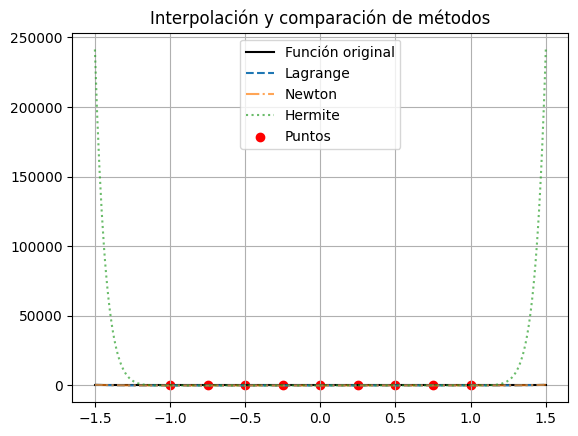

In [34]:
# --- Cálculo de las interpolaciones y gráficas ---
P_L = lagrange_interpolacion(puntos)
P_N = newton_interpolacion(puntos)

dfx_c = [sp.diff(f(sp.Symbol('x')), sp.Symbol('x')).evalf(subs={sp.Symbol('x'): x}) for x in x_coo] #generamos una lista dfx_c que contiene las derivadas de la función f(x) evaluadas en cada punto de x_coo
#calcula la derivada de la función f(x) de forma simbólica     #evalf evalúa la derivada en cada punto x de la lista x_coo, .evalf(subs={sp.Symbol('x'): x}este argumento sustituye el símbolo x por un valor específico x.
P_H = hermite_interpolacion(x_coo, y_coo, dfx_c)

graficar(puntos, P_L, P_N, P_H)

2. Aumente el número de nodos, analice y comente lo que ocurre.


si aumentamos el numero de nodos, no siempre podria mejorar la aproximacion (aunque puede depender de la funcion) pero al tener dicho aumento el plinomio interpolador podria oscilar mucho las cuales se vuelven mas pronunciadas y esto podria empeorar la aproximacion